In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [32]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: comm
    Found existing installation: comm 0.1.2
    Uninstalling comm-0.1.2:
      Successfully uninstalled comm-0.1.2
Note: you may need to restart the kernel to use updated packages.


In [26]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adityabarnwal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/adityabarnwal/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adityabarnwal/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adityabarnwal/nltk_data...


True

In [5]:
df=pd.read_csv('Reviews.csv')

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [8]:
df=df.head(500)

In [9]:
df.shape

(500, 10)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


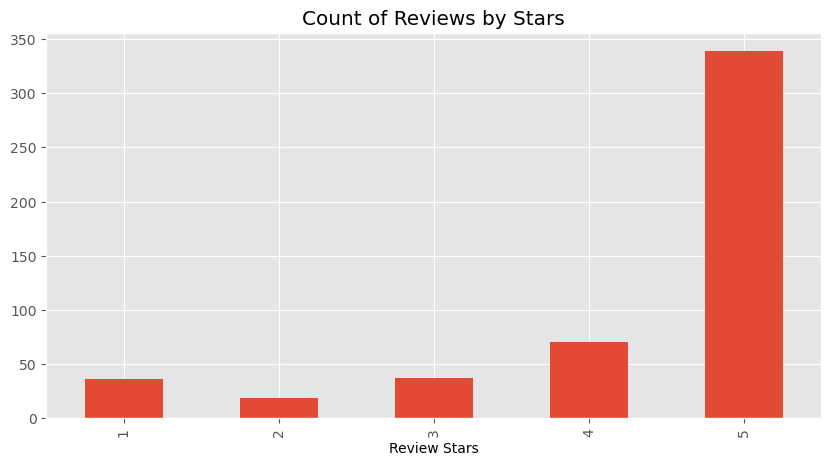

In [11]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [12]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [16]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [27]:
#VADER SENTIMENT SCORING
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [29]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [30]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [37]:
pip install --upgrade jupyter ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [39]:
conda install -n base -c conda-forge widgetsnbextension

Retrieving notices: ...working... done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::tabulate==0.8.10=py310hca03da5_0
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/noarch::python-slugify==5.0.2=pyhd3eb1b0_0
  - defaults/osx-arm64::packaging==22.0=py310hca03da5_0
  - defaults/osx-arm64::huggingface_hub==0.10.1=py310hca03da5_0
  - defaults/osx-arm64::pyflakes==3.0.1=py310hca03da5_0
  - defaults/noarch::ptyprocess==0.7.0=pyhd3eb1b0_2
  - defaults/osx-arm64::zope.interface==5.4.0=py310h1a28f6b_0
  - defaults/osx-arm64::openpyxl==3.0.10=py310h1a28f6b_0
  - defaults/osx-arm64::astropy==5.1=py310h96f19d2_0
  - defaults/noarch::yapf==0.31.0=pyhd3eb1b0_0
  - defaults/osx-arm64::patsy==0.5.3=py310hca03da5_0
  - defaults/osx-arm64::nbformat==5.7.0=py310hca03da5_0
  - defaults/noarch::poyo==0.5.0=py

done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



## Package Plan ##

  environment location: /Users/adityabarnwal/anaconda3

  added / updated specs:
    - widgetsnbextension


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       hf0a4a13_0         151 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    click-8.1.7                |unix_pyh707e725_0          82 KB  conda-forge
    openssl-1.1.1w             |       h53f4e23_0         1.6 MB  conda-forge
    pygments-2.18.0            |     pyhd8ed1ab_0         859 KB  conda-forge
    tenacity-8.4.2             |     pyhd8ed1

In [ ]:
conda install -n base -c conda-forge widgetsnbextension
conda install -n pyenv -c conda-forge ipywidgets

In [48]:
conda install -n base -c conda-forge jupyterlab_widgets

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



## Package Plan ##

  environment location: /Users/adityabarnwal/anaconda3

  added / updated specs:
    - jupyterlab_widgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyterlab_widgets-3.0.11  |     pyhd8ed1ab_0         182 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         182 KB

The following NEW packages will be INSTALLED:

  jupyterlab_widgets conda-forge/noarch::jupyterlab_widgets-3.0.11-pyhd8ed1ab_0 



                                                                          

In [46]:
pip install --upgrade tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
Note: you may need to restart the kernel to use updated packages.


In [50]:
from tqdm import tqdm

# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)






  0%|                                                   | 0/500 [00:00<?, ?it/s]




 34%|█████████████▏                         | 169/500 [00:00<00:00, 1688.38it/s]




100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2263.13it/s]


In [51]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [52]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Exception ignored in: <function tqdm.__del__ at 0x161cf1c60>
Traceback (most recent call last):
  File "/Users/adityabarnwal/anaconda3/lib/python3.10/site-packages/tqdm/std.py", line 1162, in __del__
    
  File "/Users/adityabarnwal/anaconda3/lib/python3.10/site-packages/tqdm/notebook.py", line 288, in close
    
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


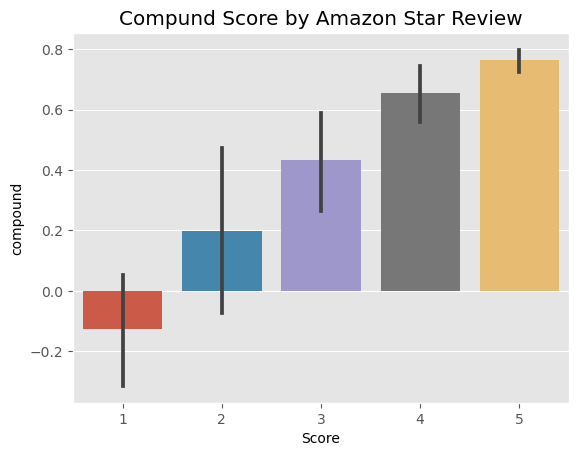

In [53]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

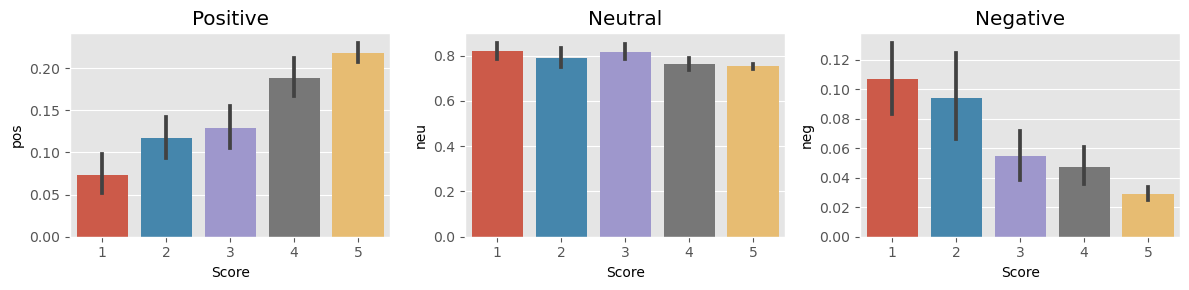

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [55]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [57]:
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

In [58]:
#ROBERTA PRETRAINED MODEL
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [59]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading: 100%|██████████████████████████████| 747/747 [00:00<00:00, 237kB/s]
Downloading: 100%|████████████████████████████| 899k/899k [00:00<00:00, 943kB/s]
Downloading: 100%|████████████████████████████| 456k/456k [00:01<00:00, 333kB/s]
Downloading: 100%|█████████████████████████████| 150/150 [00:00<00:00, 52.4kB/s]
Downloading: 100%|███████████████████████████| 499M/499M [01:44<00:00, 4.76MB/s]


In [60]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [61]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573708}


In [62]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [63]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

 16%|██████▉                                   | 82/500 [00:45<02:53,  2.41it/s]

Broke for id 83


 37%|███████████████▎                         | 186/500 [01:46<02:22,  2.21it/s]

Broke for id 187


100%|█████████████████████████████████████████| 500/500 [04:56<00:00,  1.69it/s]


In [64]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [65]:
#Compare scores between models
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

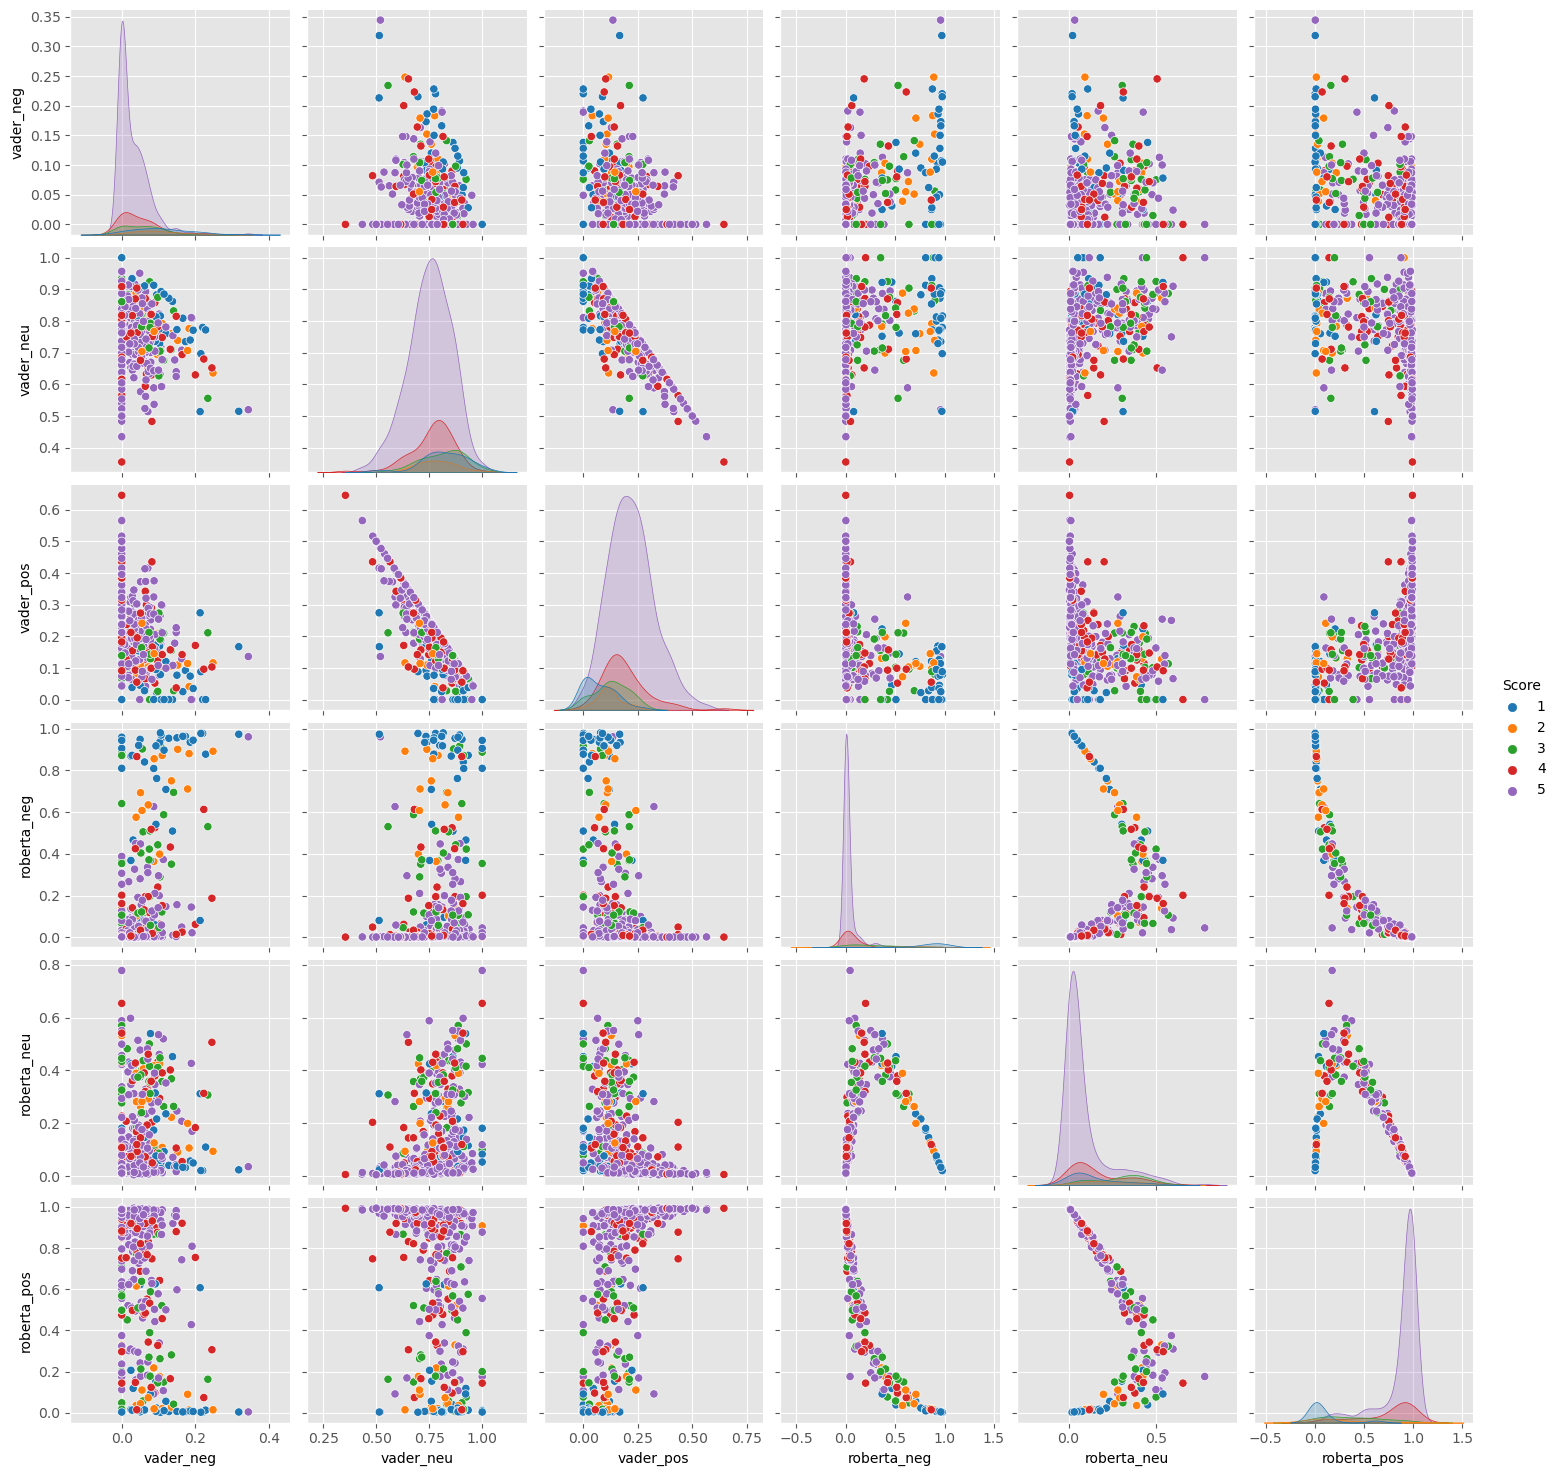

In [67]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [68]:
#Review Examples
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [69]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [70]:
# negative sentiment 5-Star view
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [71]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [81]:
import pickle

# Save VADER Sentiment Analyzer (sia)
filename_vader = 'vader_sentiment_analyzer.sav'
pickle.dump(sia, open(filename_vader, 'wb'))

# Save Roberta Model (assuming 'model' and 'tokenizer' are defined elsewhere)
filename_roberta = 'roberta_model.sav'
pickle.dump(model, open(filename_roberta, 'wb'))

In [82]:
# Load VADER Sentiment Analyzer
loaded_vader = pickle.load(open('vader_sentiment_analyzer.sav', 'rb'))

# Load Roberta Model (assuming 'model' and 'tokenizer' are defined elsewhere)
loaded_roberta = pickle.load(open('roberta_model.sav', 'rb'))

In [84]:
# Example usage of loaded VADER sentiment analyzer
example_text = "This is an example sentence."
vader_scores = loaded_vader.polarity_scores(example_text)
print("VADER Scores:", vader_scores)

# Example usage of loaded Roberta model
example_text = "This is another example sentence."
roberta_scores = polarity_scores_roberta(example_text)
print("Roberta Scores:", roberta_scores)

VADER Scores: {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}
Roberta Scores: {'roberta_neg': 0.28280133, 'roberta_neu': 0.6181253, 'roberta_pos': 0.09907338}
